In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

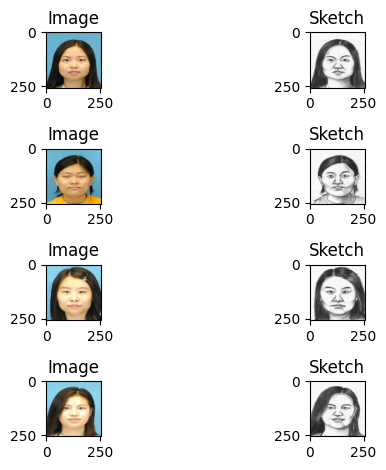

In [35]:
#for the CUHK dataset

#the image in the folders are not sorted correctly
#we need to sort them in order to retrieve the faces and the corresponding sketches

def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

photo_files = "./CUHK Face Sketch Database (CUFS)/photos"
sketch_files = "./CUHK Face Sketch Database (CUFS)/sketches"

photos = sorted_alphanumeric(os.listdir(photo_files))
sketches = sorted_alphanumeric(os.listdir(sketch_files))


#the paths have to be modified according to the user files
photos = ["./CUHK Face Sketch Database (CUFS)/photos"+"/"+ element for element in photos]
sketches = ["./CUHK Face Sketch Database (CUFS)/sketches" +"/"+ element for element in sketches]

#loading the iamge and transforming them into tensors
def load_data(path):
    image = tf.keras.utils.load_img(path)
    image = tf.keras.utils.img_to_array(image)
    image = image/255.
    return image

data_photo = []


for photo in photos :
    image = load_data(photo)
    data_photo.append(image)
    
data_sketch = []

for sketch in sketches: 
    image = load_data(sketch)
    data_sketch.append(image)

data_photo = np.array(data_photo)
data_sketch = np.array(data_sketch)


#construcing the dataset
#containing of photos and corresponding sketches
data = tf.data.Dataset.from_tensor_slices((data_photo, data_sketch))


IMG_SIZE = 256


def preprocess_data(photo, sketch, data_augmentation = False):
    
    
    image_sketch = tf.cast(photo, tf.float32)
    image_photo  = tf.cast(sketch, tf.float32)
    
    
    image_sketch = tf.image.resize(image_sketch, [IMG_SIZE, IMG_SIZE],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    
    image_photo = tf.image.resize(image_photo, [IMG_SIZE,IMG_SIZE],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    #normalize data

    #image_photo = image_photo/127.5 -1
    #image_sketch = image_sketch/127.5 -1
    
    if data_augmentation :
        
        #crop images
        
        image_photo = tf.image.random_crop(image_photo, size=[IMG_SIZE, IMG_SIZE, 3])
        image_sketch = tf.image.random_crop(image_sketch, size=[IMG_SIZE, IMG_SIZE, 3])
        
        # Resizing to 286x286
        
        image_sketch = tf.image.resize(image_sketch, [286, 286],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
        image_photo = tf.image.resize(image_photo, [286,286],
                                    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
        
        # Random cropping back to 256x256
    
        image_photo = tf.image.random_crop(image_photo, size=[IMG_SIZE, IMG_SIZE, 3])
        image_sketch = tf.image.random_crop(image_sketch, size=[IMG_SIZE, IMG_SIZE, 3])
        
        
        if tf.random.uniform(()) > 0.5:
            # Random mirroring
            image_photo = tf.image.flip_left_right(image_photo)
            image_sketch = tf.image.flip_left_right(image_sketch)
            
        #transforming images into black and white, also sketches because they are in color (although they are black and white)
        image_photo = tf.image.rgb_to_grayscale(image_photo)        
        image_sketch = tf.image.rgb_to_grayscale(image_sketch)        
    
    return image_sketch, image_photo

data = data.map(preprocess_data)

#taking the first two elements of the dataset and displaying them
element = data.take(4)
fig, ax = plt.subplots(4,2)

for index,a in enumerate(element):
    ax[index][0].imshow(a[0].numpy())
    ax[index][1].imshow(a[1].numpy())
    
    ax[index][0].set_title("Image")
    ax[index][1].set_title("Sketch")
    
    
fig.tight_layout()


Shape of sketch:  (256, 256, 3)
Shape of image:  (256, 256, 3)


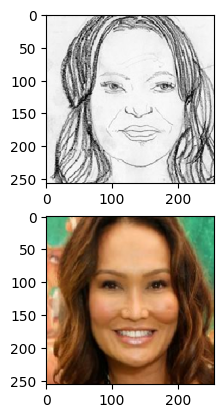

In [13]:
# for the fs2k dataset

#for file in os.listdir("./FS2K/sketch/sketch2"):
    #os.rename(os.path.join("./FS2K/sketch/sketch2",file), os.path.join("./FS2K/sketch/sketch2",file.split(".")[0]+".jpg"))
    
base_element = "./FS2K/"
IMG_SIZE = 256

    
def load_data(photo, sketch, data_augmentation = False):
    
    
    image_photo = tf.io.read_file(photo)
    image_photo = tf.io.decode_jpeg(image_photo)
    
    
    image_sketch = tf.io.read_file(sketch)
    image_sketch = tf.io.decode_jpeg(image_sketch)
    
    image_sketch = tf.cast(image_sketch, tf.float32)
    image_photo  = tf.cast(image_photo, tf.float32)
    
    
    image_sketch = tf.image.resize(image_sketch, [IMG_SIZE, IMG_SIZE],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    
    image_photo = tf.image.resize(image_photo, [IMG_SIZE,IMG_SIZE],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    #normalize data

    #image_photo = image_photo/127.5 -1
    #image_sketch = image_sketch/127.5 -1
    
    if data_augmentation :
        
        #crop images
        
        image_photo = tf.image.random_crop(image_photo, size=[IMG_SIZE, IMG_SIZE, 3])
        image_sketch = tf.image.random_crop(image_sketch, size=[IMG_SIZE, IMG_SIZE, 3])
        
        # Resizing to 286x286
        
        image_sketch = tf.image.resize(image_sketch, [286, 286],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
        image_photo = tf.image.resize(image_photo, [286,286],
                                    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
        
        # Random cropping back to 256x256
    
        image_photo = tf.image.random_crop(image_photo, size=[IMG_SIZE, IMG_SIZE, 3])
        image_sketch = tf.image.random_crop(image_sketch, size=[IMG_SIZE, IMG_SIZE, 3])
        
        
        if tf.random.uniform(()) > 0.5:
            # Random mirroring
            image_photo = tf.image.flip_left_right(image_photo)
            image_sketch = tf.image.flip_left_right(image_sketch)
            
        #transforming images into black and white, also sketches because they are in color (although they are black and white)
        #image_photo = tf.image.rgb_to_grayscale(image_photo)        
        #image_sketch = tf.image.rgb_to_grayscale(image_sketch)        
    
    return image_sketch, image_photo


photo_data_1 = tf.data.Dataset.list_files(base_element + "photo/photo1/*.jpg", shuffle=False)
photo_data_2 = tf.data.Dataset.list_files(base_element + "photo/photo2/*.jpg", shuffle=False)
photo_data_3 = tf.data.Dataset.list_files(base_element + "photo/photo3/*.jpg", shuffle=False)

sketch_data_1 = tf.data.Dataset.list_files(base_element + "sketch/sketch1/*.jpg", shuffle=False)
sketch_data_2 = tf.data.Dataset.list_files(base_element + "sketch/sketch2/*.jpg", shuffle=False)
sketch_data_3 = tf.data.Dataset.list_files(base_element + "sketch/sketch3/*.jpg", shuffle=False)

photo_data = photo_data_1.concatenate(photo_data_2)
photo_data = photo_data.concatenate(photo_data_3)

sketch_data = sketch_data_1.concatenate(sketch_data_2)
sketch_data = sketch_data.concatenate(sketch_data_3)

merged_data = tf.data.Dataset.zip((photo_data, sketch_data))

new_data = merged_data.map(lambda x, y: load_data(x,y,data_augmentation = True))

for element in new_data.take(1):
    
    fig, ax = plt.subplots(2,1)
    
    ax[0].imshow(element[0].numpy()/255.)
    ax[1].imshow(element[1].numpy()/255.)
    
    
    print("Shape of sketch: " , element[1].shape)
    print("Shape of image: ", element[0].shape)

In [104]:
print("this is cool")

this is cool


2103